In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [ ]:
from sklearn.datasets import  fetch_mldata

In [ ]:
minist = fetch_mldata('MNIST original',data_home='./datasets')

In [ ]:
X,y = minist["data"],minist["target"]
X.shape#(70000, 784)
y.shape#(70000,)
#这个数据集其实就是一个灰度图  图像为28*28*1=784个像素

In [ ]:
#指定训练集和测试集
#其中X为特征，y为目标值
X_train,X_test = X[:60000],X[60000:]
y_train,y_test = y[:60000],y[60000:]

In [ ]:
#洗牌操作
import numpy as np
shuffle_index = np.random.permutation(60000)
#Randomly permute a sequence, or return a permuted range.
#If x is a multi-dimensional array, it is only shuffled along its first index.
#得到一个随机的0-60000的数组
shuffle_index#array([30014, 20704, 39358, ..., 16650, 46800,  7085])
#把这些索引值回传到训练集中们 就是打乱数据集
#注意这里两个集合需要对应
X_train ,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [ ]:
#进行交叉验证,为了方便使用，进行二分类操作，
#选出数值为5的项
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,random_state=42)#使用随机种子，确保每次结果一样
sgd_clf.fit(X_train,y_train_5)

In [ ]:
#在官方文档中可以查看分类器可以使用的方法如predict来预测数据等
sgd_clf.predict([X[35000]])
#报错：期望一个二维的样本，但是给了一个一维的样本
#返回true  预测正确

In [ ]:
y[32000]

In [ ]:
#进行交叉验证
#可以自己选择数据集进行训练，也可以通过sklearn自带的功能来进行交叉验证
from sklearn.model_selection import  cross_val_score
#注意只需要传入训练集！！！不用自己进行分割
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')#cv为分割策略这里的3为将训练集切分为3份
#scirng 为评分方法
'''
array([0.85442911, 0.85284264, 0.83027454])
'''

In [ ]:
#也可以自己手动操作
from sklearn.model_selection import  StratifiedKFold
from sklearn.base import  clone #可以克隆模型
skf = StratifiedKFold(n_splits=3,random_state=42)


In [30]:
for train_index , vary_index in skf.split(X_train,y_train):#通过split来获得训练集和验证集
    clone_clf = clone(sgd_clf)#克隆模型
    X_train_folds = X_train[train_index]
    y_train_folds =y_train[train_index]
    X_test_folds = X_train[vary_index]
    y_test_folds = y_train[vary_index]
    #铜鼓分类器来训练
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    #预测准确率
    n_correct= sum(y_pred==y_test_folds)
    print(n_correct)
'''
16816
16979
17328
'''

16979
17328


'\n16816\n16979\n17328\n'

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
#(60000,)X：60000因为将训练集分为三分，进行了三次运算，三次验证集加起来为60000

In [32]:
import pandas as pd
y_train_predict

array([False, False, False, ..., False, False, False])

In [33]:
pd.Series(y_train_predict).value_counts()

False    54349
True      5651
dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)
'''
array([[53272,  1307],[ 1077,  4344]], dtype=int64)
'''

'\narray([[53272,  1307],[ 1077,  4344]], dtype=int64)\n'

In [38]:
y_scores = sgd_clf.decision_function(X[35000:60000])

array([  43349.73739616,  199462.44873406,  -95877.20355713, ...,
       -204517.36515234, -221946.26026495,  -88253.42407613])

In [41]:
from sklearn.metrics import precision_recall_curve


In [43]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
precision,recall,thresholds = precision_recall_curve(y_train_5,y_scores)
#进度，召回率，阈值
#可以通过plot打印出来

In [45]:
from matplotlib import pyplot as plt

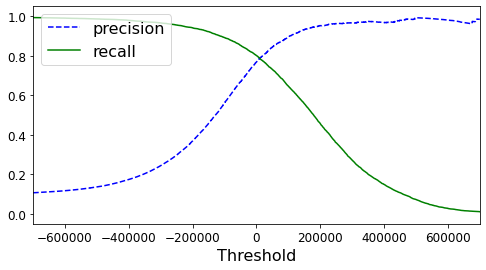

In [52]:
def plot_pr_recall_threshold(precision,recall,thresholds):
    plt.plot(thresholds,precision[:-1],"b--",label="precision")
    plt.plot(thresholds,recall[:-1],"g-",label="recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.xlim([0,1])
plt.figure(figsize=(8,4))
plot_pr_recall_threshold(precision,recall,thresholds)
plt.xlim([-700000,700000])
plt.show()


In [54]:
from sklearn.metrics import roc_curve
fpr ,tpr,thresholds = roc_curve(y_train_5,y_scores)

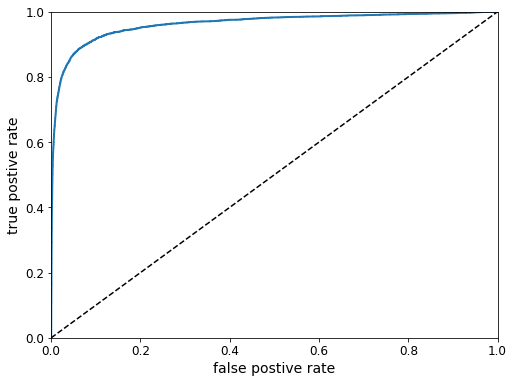

In [59]:
def plot_ROC(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.axis([0,1,0,1])
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("false postive rate")
    plt.ylabel("true postive rate")
plt.figure(figsize=(8,6))
plot_ROC(fpr,tpr)
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)#0.9624496555967155

0.9624496555967155